<a href="https://colab.research.google.com/github/amirali0840/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3158 non-null   int64  
 1   Location     3158 non-null   object 
 2   Area         3158 non-null   int64  
 3   Rainfall     3158 non-null   float64
 4   Temperature  3158 non-null   float64
 5   Soil type    3100 non-null   object 
 6   Irrigation   3158 non-null   object 
 7   yeilds       3158 non-null   float64
 8   Humidity     3158 non-null   float64
 9   Crops        3158 non-null   object 
 10  price        3158 non-null   int64  
 11  Season       3158 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 296.2+ KB
None

First 5 rows of the dataset:
   Year   Location   Area  Rainfall  Temperature Soil type Irrigation  \
0  2004  Mangalore   1279    2903.1         27.0  Alluvial       Drip   
1  2004  Mangalore  13283    2903.1         27

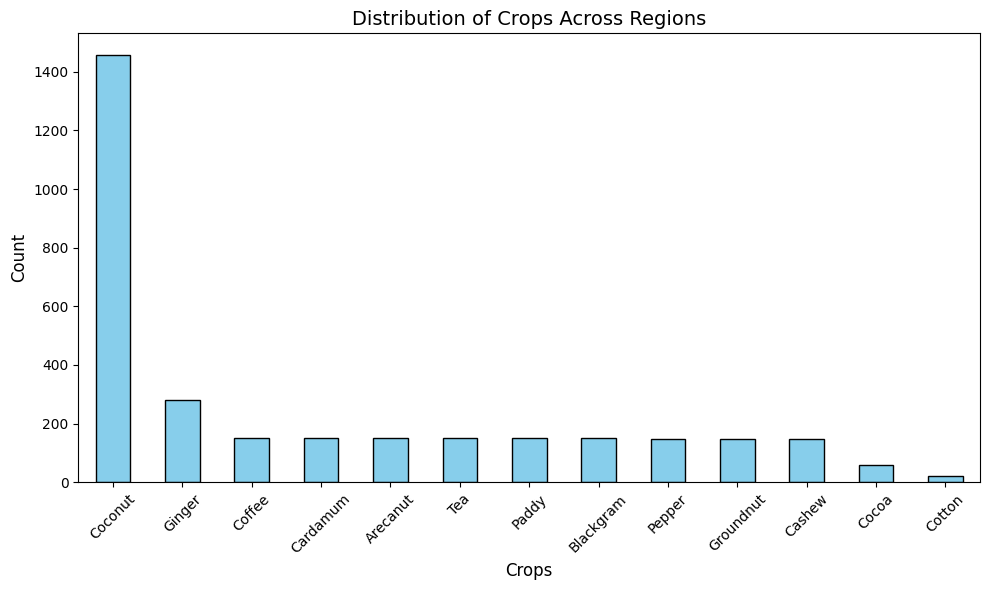

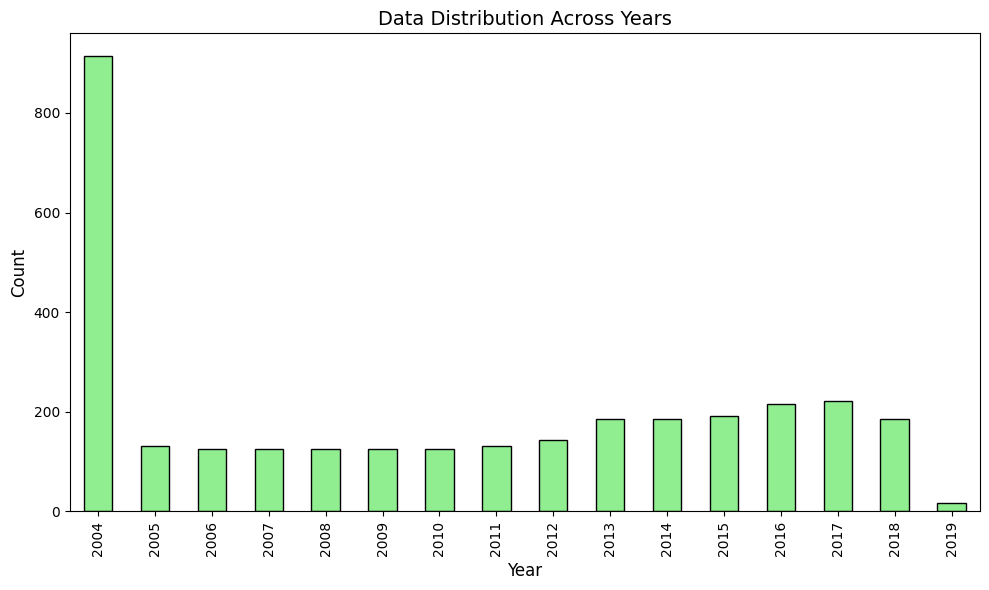

<Figure size 1200x800 with 0 Axes>

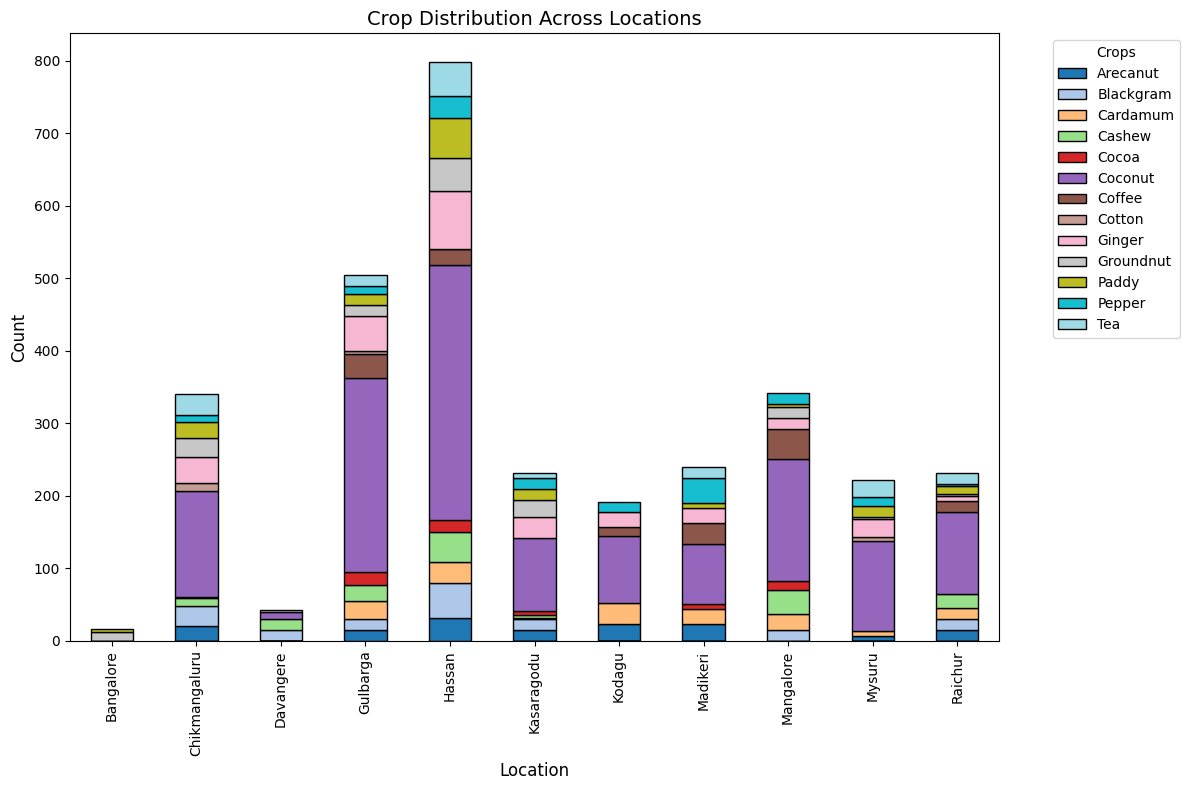

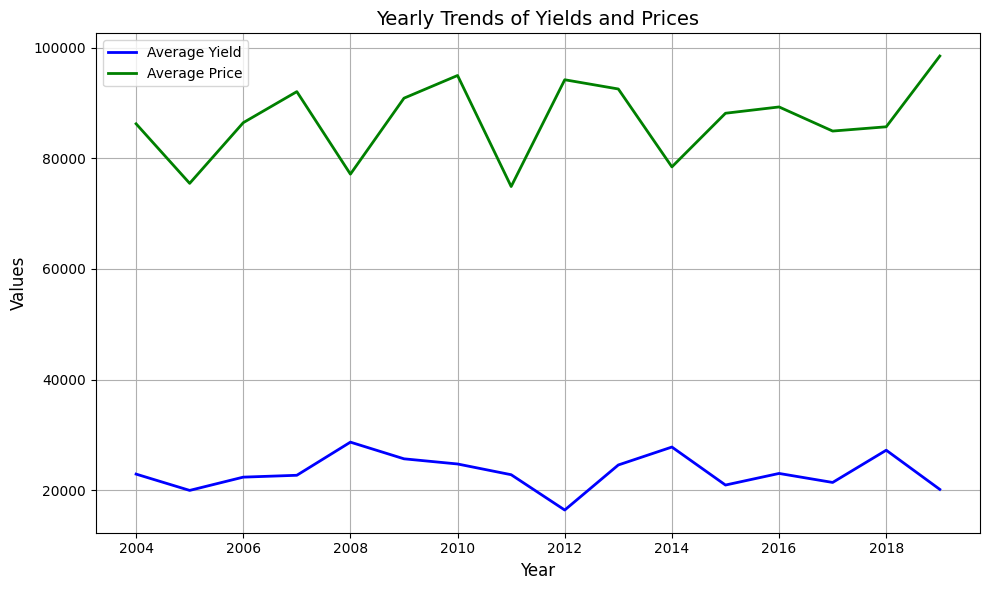

Crop Distribution Across Locations:
Crops          Arecanut  Blackgram  Cardamum  Cashew  Cocoa  Coconut  Coffee  \
Location                                                                       
Bangalore             0          0         0       0      0        0       0   
Chikmangaluru        20         28         0      11      1      146       0   
Davangere             0         15         0      15      0        9       0   
Gulbarga             15         15        25      22     18      268      32   
Hassan               32         47        29      42     17      352      21   
Kasaragodu           15         15         2       3      6      101       0   
Kodagu               23          0        29       0      0       93      12   
Madikeri             23          0        21       0      6       84      28   
Mangalore             0         15        22      33     12      168      42   
Mysuru                7          0         7       0      0      124       0   
Raic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data_season.csv")

# Summary of the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Crop distribution
crop_distribution = data["Crops"].value_counts()

# Distribution of data by year
yearly_distribution = data["Year"].value_counts().sort_index()

# Crop distribution across regions
location_crop_distribution = data.groupby("Location")["Crops"].value_counts().unstack(fill_value=0)

# Trends in yields and prices over years
yearly_trends = data.groupby("Year")[["yeilds", "price"]].mean()

# Plot crop distribution
plt.figure(figsize=(10, 6))
crop_distribution.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Crops Across Regions", fontsize=14)
plt.xlabel("Crops", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot yearly distribution
plt.figure(figsize=(10, 6))
yearly_distribution.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Data Distribution Across Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

# Plot crop distribution across locations
plt.figure(figsize=(12, 8))
location_crop_distribution.plot(kind="bar", stacked=True, figsize=(12, 8), cmap="tab20", edgecolor="black")
plt.title("Crop Distribution Across Locations", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Crops", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Plot yearly trends for yields and prices
plt.figure(figsize=(10, 6))
yearly_trends["yeilds"].plot(label="Average Yield", color="blue", linewidth=2)
yearly_trends["price"].plot(label="Average Price", color="green", linewidth=2)
plt.title("Yearly Trends of Yields and Prices", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Crop Distribution Across Locations:")
print(location_crop_distribution)

print("\nYearly Trends of Yields and Prices:")
print(yearly_trends)

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## **Introduction to Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab where you will get a quick introduction to the Python programming language and the environment used for the course's exercises: Colab.

Colab is a Python development environment that runs in the browser using Google Cloud.

For example, to print "Hello World", just hover the mouse over [ ] and press the play button to the upper left. Or press shift-enter to execute.

In [ ]:
print("Hello World")

## Functions, Conditionals, and Iteration
Let's create a Python function, and call it from a loop.

In [ ]:
def HelloWorldXY(x, y):
  if (x < 10):
    print("Hello World, x was < 10")
  elif (x < 20):
    print("Hello World, x was >= 10 but < 20")
  else:
    print("Hello World, x was >= 20")
  return x + y

for i in range(8, 25, 5):  # i=8, 13, 18, 23 (start, stop, step)
  print("--- Now running with i: {}".format(i))
  r = HelloWorldXY(i,i)
  print("Result from HelloWorld: {}".format(r))

In [ ]:
print(HelloWorldXY(1,2))

Easy, right?

If you want a loop starting at 0 to 2 (exclusive) you could do any of the following

In [ ]:
print("Iterate over the items. `range(2)` is like a list [0,1].")
for i in range(2):
  print(i)

print("Iterate over an actual list.")
for i in [0,1]:
  print(i)

print("While works")
i = 0
while i < 2:
  print(i)
  i += 1

In [ ]:
print("Python supports standard key words like continue and break")
while True:
  print("Entered while")
  break

## Numpy and lists
Python has lists built into the language.
However, we will use a library called numpy for this.
Numpy gives you lots of support functions that are useful when doing Machine Learning.

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax.

In [ ]:
import numpy as np  # Make numpy available using np.

# Create a numpy array, and append an element
a = np.array(["Hello", "World"])
a = np.append(a, "!")
print("Current array: {}".format(a))
print("Printing each element")
for i in a:
  print(i)

print("\nPrinting each element and their index")
for i,e in enumerate(a):
  print("Index: {}, was: {}".format(i, e))

In [ ]:
print("\nShowing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Average: {}".format(np.average(b)))
print("Max index: {}".format(np.argmax(b)))

In [ ]:
print("\nYou can print the type of anything")
print("Type of b: {}, type of b[0]: {}".format(type(b), type(b[0])))

In [ ]:
print("\nUse numpy to create a [3,3] dimension array with random number")
c = np.random.rand(3, 3)
print(c)

In [ ]:
print("\nYou can print the dimensions of arrays")
print("Shape of a: {}".format(a.shape))
print("Shape of b: {}".format(b.shape))
print("Shape of c: {}".format(c.shape))
print("...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists")

## Colab Specifics

Colab is a virtual machine you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation point (!).


In [ ]:
print("\nDoing $ls on filesystem")
!ls -l
!pwd

In [ ]:
print("Install numpy")  # Just for test, numpy is actually preinstalled in all Colab instances
!pip install numpy

**Exercise**

Create a code cell underneath this text cell and add code to:


*   List the path of the current directory (pwd)
* Go to / (cd) and list the content (ls -l)

In [ ]:
!pwd
!cd /
!ls -l
print("Hello")

All usage of Colab in this course is completely free or charge. Even GPU usage is provided free of charge for some hours of usage every day.

**Using GPUs**
* Many of the exercises in the course executes more quickly by using GPU runtime: Runtime | Change runtime type | Hardware accelerator | GPU

**Some final words on Colab**
*   You execute each cell in order, you can edit & re-execute cells if you want
*   Sometimes, this could have unintended consequences. For example, if you add a dimension to an array and execute the cell multiple times, then the cells after may not work. If you encounter problem reset your environment:
  *   Runtime -> Restart runtime... Resets your Python shell
  *   Runtime -> Restart all runtimes... Will reset the Colab image, and get you back to a 100% clean environment
* You can also clear the output in the Colab by doing: Edit -> Clear all outputs
* Colabs in this course are loaded from GitHub. Save to your Google Drive if you want a copy with your code/output: File -> Save a copy in Drive...

**Learn More**
*   Check out [this](https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=3) episode of #CodingTensorFlow, and don't forget to subscribe to the YouTube channel ;)
